<a href="https://colab.research.google.com/github/advadj67/hw3_M11221004/blob/main/HW03_YoloV8_Colab_0517.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics
!git clone https://github.com/advadj67/hw3_M11221004.git

fatal: destination path 'hw3_M11221004' already exists and is not an empty directory.


In [ ]:
'''
#將.xml轉成Yolo所需 .txt檔案
import os
import xml.etree.ElementTree as ET

def convert_coordinates(size, box):
    # 轉換坐標
    dw = 1.0 / size[0]
    dh = 1.0 / size[1]
    x = (box[0] + box[1]) / 2.0
    y = (box[2] + box[3]) / 2.0
    w = box[1] - box[0]
    h = box[3] - box[2]
    x = x * dw
    w = w * dw
    y = y * dh
    h = h * dh
    return (x, y, w, h)

def convert_xml_to_yolo(xml_path, output_root, class_dict, output_folders):
    # 解析XML並轉換為YOLO格式
    tree = ET.parse(xml_path)
    root = tree.getroot()

    size = root.find('size')
    w = int(size.find('width').text)
    h = int(size.find('height').text)

    for output_folder in output_folders:
        folder_name = os.path.basename(output_folder)
        output_dir = os.path.join(output_root, folder_name)
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)

        output_file_path = os.path.join(output_dir, os.path.splitext(os.path.basename(xml_path))[0] + '.txt')
        with open(output_file_path, 'w') as f:
            for obj in root.findall('object'):
                cls = obj.find('name').text
                if cls not in class_dict:
                    continue
                cls_id = class_dict[cls]
                xml_box = obj.find('bndbox')
                box = (float(xml_box.find('xmin').text), float(xml_box.find('xmax').text),
                       float(xml_box.find('ymin').text), float(xml_box.find('ymax').text))
                bb = convert_coordinates((w,h), box)
                f.write(f"{cls_id} {' '.join([str(a) for a in bb])}\n")

# 資料夾列表
folders = ["訓練集_xml", "驗證集_xml", "測試集_xml"]
o_folders = ["train", "val", "test"]

# 分類字典，將類別名映射到整數標籤
class_dict = {"container": 0}

# 輸出根資料夾路徑
output_root = "E:\Downloads\貨櫃資料集\labels"

# 如果輸出根資料夾不存在，則創建
if not os.path.exists(output_root):
    os.makedirs(output_root)

# 迴圈處理每個資料夾
for folder, o_folder in zip(folders, o_folders):
    folder_path = os.path.join("E:\Downloads\貨櫃資料集", folder)  # 資料夾路徑
    xml_files = [f for f in os.listdir(folder_path) if f.endswith('.xml')]  # 獲取所有XML檔案
    output_folders = [os.path.join(output_root, o_folder)]  # 輸出資料夾路徑
    for xml_file in xml_files:
        xml_path = os.path.join(folder_path, xml_file)  # XML檔案路徑
        convert_xml_to_yolo(xml_path, output_root, class_dict, output_folders)

print("labels轉換完成!")
'''

'\n#將.xml轉成Yolo所需 .txt檔案\nimport os\nimport xml.etree.ElementTree as ET\n\ndef convert_coordinates(size, box):\n    # 轉換坐標\n    dw = 1.0 / size[0]\n    dh = 1.0 / size[1]\n    x = (box[0] + box[1]) / 2.0\n    y = (box[2] + box[3]) / 2.0\n    w = box[1] - box[0]\n    h = box[3] - box[2]\n    x = x * dw\n    w = w * dw\n    y = y * dh\n    h = h * dh\n    return (x, y, w, h)\n\ndef convert_xml_to_yolo(xml_path, output_root, class_dict, output_folders):\n    # 解析XML並轉換為YOLO格式\n    tree = ET.parse(xml_path)\n    root = tree.getroot()\n\n    size = root.find(\'size\')\n    w = int(size.find(\'width\').text)\n    h = int(size.find(\'height\').text)\n\n    for output_folder in output_folders:\n        folder_name = os.path.basename(output_folder)\n        output_dir = os.path.join(output_root, folder_name)\n        if not os.path.exists(output_dir):\n            os.makedirs(output_dir)\n\n        output_file_path = os.path.join(output_dir, os.path.splitext(os.path.basename(xml_path))[0] + \'.

In [ ]:
'''
from PIL import Image

# 資料夾列表
folder_path = "E:/Downloads/貨櫃資料集/"
folders = [folder_path + "訓練集", folder_path + "驗證集", folder_path + "測試集"]

output_folders = [folder_path + "images/train", folder_path + "images/val", folder_path + "images/test"]


# 創建輸出資料夾
for output_folder in output_folders:
    os.makedirs(output_folder, exist_ok=True)

# 轉換函數
def resize_images(folder, output_folder):
    # 獲取資料夾中所有圖片的檔案名稱
    files = os.listdir(folder)

    # 迴圈處理每張圖片
    for file in files:
        # 檔案路徑
        file_path = os.path.join(folder, file)

        # 如果是檔案
        if os.path.isfile(file_path):
            # 打開圖片
            img = Image.open(file_path)

            # 重新調整大小
            resized_img = img.resize((416, 416))

            # 另存新圖片
            resized_img.save(os.path.join(output_folder, file))

# 對每個資料夾和對應的輸出資料夾調用resize_images函數
for folder, output_folder in zip(folders, output_folders):
    resize_images(folder, output_folder)

print("images轉換完成!")
'''

'\nfrom PIL import Image\n\n# 資料夾列表\nfolder_path = "E:/Downloads/貨櫃資料集/"\nfolders = [folder_path + "訓練集", folder_path + "驗證集", folder_path + "測試集"]\n\noutput_folders = [folder_path + "images/train", folder_path + "images/val", folder_path + "images/test"]\n\n\n# 創建輸出資料夾\nfor output_folder in output_folders:\n    os.makedirs(output_folder, exist_ok=True)\n\n# 轉換函數\ndef resize_images(folder, output_folder):\n    # 獲取資料夾中所有圖片的檔案名稱\n    files = os.listdir(folder)\n\n    # 迴圈處理每張圖片\n    for file in files:\n        # 檔案路徑\n        file_path = os.path.join(folder, file)\n\n        # 如果是檔案\n        if os.path.isfile(file_path):\n            # 打開圖片\n            img = Image.open(file_path)\n\n            # 重新調整大小\n            resized_img = img.resize((416, 416))\n\n            # 另存新圖片\n            resized_img.save(os.path.join(output_folder, file))\n\n# 對每個資料夾和對應的輸出資料夾調用resize_images函數\nfor folder, output_folder in zip(folders, output_folders):\n    resize_images(folder, output_folder)\n\nprint(

In [ ]:
'''
#修改bounding box座標

def resize_bounding_boxes(label_file_path, original_size, new_size):
    # 讀取原始標籤文件
    with open(label_file_path, 'r') as f:
        lines = f.readlines()

    # 計算大小比例
    width_ratio = new_size[0] / original_size[0]
    height_ratio = new_size[1] / original_size[1]

    # 對每個 bounding box 進行調整
    for i, line in enumerate(lines):
        parts = line.strip().split()
        # 解析原始 bounding box 坐標
        x_center = float(parts[1])
        y_center = float(parts[2])
        width = float(parts[3])
        height = float(parts[4])
        # 調整 bounding box 坐標
        x_center *= width_ratio
        y_center *= height_ratio
        width *= width_ratio
        height *= height_ratio
        # 更新標籤文件中的 bounding box 坐標
        lines[i] = f"{parts[0]} {x_center} {y_center} {width} {height}\n"

    # 將更新後的內容寫回標籤文件
    with open(label_file_path, 'w') as f:
        f.writelines(lines)

# 設置原始影像大小和新影像大小
original_size = (1920, 1080)
new_size = (416, 416)

# 設置資料集目錄路徑
dataset_dir = "/content/hw3_M11221004/貨櫃資料集/labels"
subfolders = ['train', 'val', 'test']

# 迴圈遍歷每個子資料夾中的標籤文件
for subfolder in subfolders:
    subfolder_path = os.path.join(dataset_dir, subfolder)
    label_files = [f for f in os.listdir(subfolder_path) if f.endswith('.txt')]
    for label_file in label_files:
        label_file_path = os.path.join(subfolder_path, label_file)
        # 調整 bounding box 坐標
        resize_bounding_boxes(label_file_path, original_size, new_size)
'''

'\n#修改bounding box座標\n\ndef resize_bounding_boxes(label_file_path, original_size, new_size):\n    # 讀取原始標籤文件\n    with open(label_file_path, \'r\') as f:\n        lines = f.readlines()\n\n    # 計算大小比例\n    width_ratio = new_size[0] / original_size[0]\n    height_ratio = new_size[1] / original_size[1]\n\n    # 對每個 bounding box 進行調整\n    for i, line in enumerate(lines):\n        parts = line.strip().split()\n        # 解析原始 bounding box 坐標\n        x_center = float(parts[1])\n        y_center = float(parts[2])\n        width = float(parts[3])\n        height = float(parts[4])\n        # 調整 bounding box 坐標\n        x_center *= width_ratio\n        y_center *= height_ratio\n        width *= width_ratio\n        height *= height_ratio\n        # 更新標籤文件中的 bounding box 坐標\n        lines[i] = f"{parts[0]} {x_center} {y_center} {width} {height}\n"\n\n    # 將更新後的內容寫回標籤文件\n    with open(label_file_path, \'w\') as f:\n        f.writelines(lines)\n\n# 設置原始影像大小和新影像大小\noriginal_size = (1920, 1080)\nne

In [20]:
import shutil

# 要刪除的資料夾路徑
folder_path = '/content/runs/detect'

# 使用 shutil.rmtree() 函數刪除資料夾
shutil.rmtree(folder_path)


In [68]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n.yaml').load('yolov8n.pt')  # build from YAML and transfer weights

# Train the model
results = model.train(data='/content/hw3_M11221004/貨櫃資料集/data.yaml', epochs=10, batch=8, imgsz=416)

model.val()  # It'll automatically evaluate the data you trained.

Transferred 355/355 items from pretrained weights
Ultralytics YOLOv8.2.16 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/hw3_M11221004/貨櫃資料集/data.yaml, epochs=10, time=None, patience=100, batch=8, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf

train: Scanning /content/hw3_M11221004/貨櫃資料集/labels/train.cache... 2125 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2125/2125 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/hw3_M11221004/貨櫃資料集/labels/val.cache... 536 images, 0 backgrounds, 0 corrupt: 100%|██████████| 536/536 [00:00<?, ?it/s]


Plotting labels to runs/detect/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train4
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10     0.927G      1.157      1.838      1.037          5        416: 100%|██████████| 266/266 [00:40<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:04<00:00,  7.31it/s]


                   all        536        536      0.998      0.998      0.995      0.778

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10     0.786G     0.8178     0.7685     0.8941          5        416: 100%|██████████| 266/266 [00:39<00:00,  6.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:04<00:00,  7.99it/s]

                   all        536        536      0.993      0.999      0.995      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10     0.774G     0.7645     0.5792      0.883          4        416: 100%|██████████| 266/266 [00:41<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.54it/s]

                   all        536        536          1      0.998      0.995      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10     0.774G     0.7364     0.4888     0.8737          4        416: 100%|██████████| 266/266 [00:37<00:00,  7.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  6.03it/s]


                   all        536        536      0.998          1      0.995      0.821

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10     0.774G     0.6875     0.4387     0.8663          4        416: 100%|██████████| 266/266 [00:39<00:00,  6.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.78it/s]

                   all        536        536      0.999      0.998      0.995      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10     0.774G     0.6749     0.4139     0.8612          5        416: 100%|██████████| 266/266 [00:37<00:00,  7.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.89it/s]

                   all        536        536          1          1      0.995      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10     0.776G      0.652     0.3864     0.8584          4        416: 100%|██████████| 266/266 [00:38<00:00,  6.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00, 10.07it/s]

                   all        536        536          1          1      0.995      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10     0.776G     0.6188      0.362      0.847          5        416: 100%|██████████| 266/266 [00:36<00:00,  7.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.64it/s]

                   all        536        536          1          1      0.995      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10     0.776G     0.5777     0.3333     0.8306          5        416: 100%|██████████| 266/266 [00:38<00:00,  6.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.91it/s]

                   all        536        536          1          1      0.995      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10     0.776G     0.5569      0.314     0.8278          4        416: 100%|██████████| 266/266 [00:38<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:03<00:00,  9.76it/s]

                   all        536        536          1          1      0.995      0.872



10 epochs completed in 0.123 hours.
Optimizer stripped from runs/detect/train4/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train4/weights/best.pt, 6.2MB

Validating runs/detect/train4/weights/best.pt...
Ultralytics YOLOv8.2.16 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:05<00:00,  5.94it/s]


                   all        536        536          1          1      0.995      0.872
Speed: 0.2ms preprocess, 2.3ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/train4
Ultralytics YOLOv8.2.16 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/hw3_M11221004/貨櫃資料集/labels/val.cache... 536 images, 0 backgrounds, 0 corrupt: 100%|██████████| 536/536 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 67/67 [00:04<00:00, 13.78it/s]


                   all        536        536          1          1      0.995      0.872
Speed: 0.2ms preprocess, 2.7ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/train42


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ddc54d59810>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [69]:
'''
#使用最佳模型在測試集上預測"貨櫃號碼"

# Define path to the image file
source = '/content/hw3_M11221004/貨櫃資料集/測試集/image_0001.jpg'

# Run inference on the source
results = model(source)  # list of Results objects

# 顯示物件類別
print(results[0].boxes.cls)
print()

# 顯示物件座標
print(results[0].boxes.xyxy)



#顯示預測框在圖片上

from PIL import Image
import cv2

# results = model.predict(source="0")
# 整個目錄
# results = model.predict(source="folder", show=True)

# from PIL
im1 = Image.open(source)
# save=True：存檔
results = model.predict(source=im1, save=True)
'''

'\n#使用最佳模型在測試集上預測"貨櫃號碼"\n\n# Define path to the image file\nsource = \'/content/hw3_M11221004/貨櫃資料集/測試集/image_0001.jpg\'\n\n# Run inference on the source\nresults = model(source)  # list of Results objects\n\n# 顯示物件類別\nprint(results[0].boxes.cls)\nprint()\n\n# 顯示物件座標\nprint(results[0].boxes.xyxy)\n\n\n\n#顯示預測框在圖片上\n\nfrom PIL import Image\nimport cv2\n\n# results = model.predict(source="0")\n# 整個目錄\n# results = model.predict(source="folder", show=True)\n\n# from PIL\nim1 = Image.open(source)\n# save=True：存檔\nresults = model.predict(source=im1, save=True)\n'

In [92]:
#預測並合併兩個預測框框

import torch

def merge_adjacent_boxes(boxes, iou_threshold=0.5):
    merged_boxes = []
    boxes = boxes.cpu().numpy()  # 將框框轉換為NumPy陣列

    for box in boxes:
        # 初始化一個合併後的框框
        merged_box = box
        for merged_box_index, merged_box_tmp in enumerate(merged_boxes):
            # 計算兩個框框的IoU
            iou = calculate_iou(merged_box_tmp, box)

            # 如果IoU大於閾值，將兩個框框合併成一個
            if iou > iou_threshold:
                x1 = min(merged_box[0], merged_box_tmp[0])
                y1 = min(merged_box[1], merged_box_tmp[1])
                x2 = max(merged_box[2], merged_box_tmp[2])
                y2 = max(merged_box[3], merged_box_tmp[3])
                merged_box = [x1, y1, x2, y2]
                merged_boxes[merged_box_index] = merged_box
                break
        else:
            # 如果沒有與現有的框框重疊，將新的框框添加到合併框框列表中
            merged_boxes.append(box)

    return torch.tensor(merged_boxes)  # 將合併後的框框轉換回PyTorch Tensor

# 計算兩個框框的IoU
def calculate_iou(box1, box2):
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])

    intersection = max(0, x2 - x1 + 1) * max(0, y2 - y1 + 1)
    area1 = (box1[2] - box1[0] + 1) * (box1[3] - box1[1] + 1)
    area2 = (box2[2] - box2[0] + 1) * (box2[3] - box2[1] + 1)

    iou = intersection / float(area1 + area2 - intersection)
    return iou



source = '/content/hw3_M11221004/貨櫃資料集/訓練集/image_0001.jpg'

# Run inference on the source
results = model(source)  # list of Results objects

# 顯示物件類別
print(results[0].boxes.cls)
print()

# 顯示物件座標
print(results[0].boxes.xyxy)

# 合併相鄰的框框
merged_boxes = merge_adjacent_boxes(results[0].boxes.xyxy)

#顯示預測框在圖片上
from PIL import Image
import cv2

# 從PIL開啟圖片
im1 = Image.open(source)

# 將合併後的框框繪製在圖片上
draw = ImageDraw.Draw(im1)
for box in merged_boxes:
    draw.rectangle(box.tolist(), outline="red")

# 顯示圖片
im1.show()

# 將圖片存檔
im1.save("output.jpg")



image 1/1 /content/hw3_M11221004/貨櫃資料集/訓練集/image_0001.jpg: 256x416 1 container number, 39.3ms
Speed: 1.9ms preprocess, 39.3ms inference, 2.1ms postprocess per image at shape (1, 3, 256, 416)
tensor([0.], device='cuda:0')

tensor([[812.0754,  28.2798, 980.2220, 130.3839]], device='cuda:0')


In [71]:
#壓縮成資料夾下載，前面是檔名.zip，後面是要被壓縮的東西
!zip -r /content/runs1.zip /content/runs

from google.colab import files
files.download("/content/runs1.zip")

updating: content/runs/ (stored 0%)
updating: content/runs/detect/ (stored 0%)
updating: content/runs/detect/train2/ (stored 0%)
updating: content/runs/detect/train2/confusion_matrix.png (deflated 37%)
updating: content/runs/detect/train2/val_batch1_labels.jpg (deflated 10%)
updating: content/runs/detect/train2/val_batch0_pred.jpg (deflated 10%)
updating: content/runs/detect/train2/P_curve.png (deflated 26%)
updating: content/runs/detect/train2/PR_curve.png (deflated 29%)
updating: content/runs/detect/train2/val_batch0_labels.jpg (deflated 10%)
updating: content/runs/detect/train2/F1_curve.png (deflated 19%)
updating: content/runs/detect/train2/val_batch2_labels.jpg (deflated 10%)
updating: content/runs/detect/train2/R_curve.png (deflated 20%)
updating: content/runs/detect/train2/val_batch2_pred.jpg (deflated 10%)
updating: content/runs/detect/train2/val_batch1_pred.jpg (deflated 10%)
updating: content/runs/detect/train2/confusion_matrix_normalized.png (deflated 36%)
updating: content/

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## 文字辨識OCR

In [72]:
!sudo apt-get update
!sudo apt-get install tesseract-ocr
!sudo apt-get install libtesseract-dev
!pip install pytesseract

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Reading pac

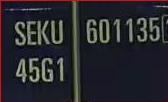

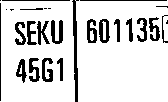

Text in box:  

‘SEKU | 6011351
4561

 



In [106]:
import cv2
import pytesseract
from google.colab.patches import cv2_imshow

# 定義裁切並進行文字辨識的函數
def crop_and_recognize(image, bounding_box):
    # 裁剪框框的區域
    x1, y1, x2, y2 = map(int, bounding_box)
    cropped_image = image[y1:y2, x1:x2]
    cv2_imshow(cropped_image)
    # 將裁剪後的圖片轉換為灰階
    gray_image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2GRAY)

    # 使用大津法計算閾值
    _, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    # 反轉二值化圖片，將背景設置為白色，文字設置為黑色
    inverted_image = cv2.bitwise_not(binary_image)

    # 設置文字辨識引擎（使用Tesseract OCR）
    pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

    # 進行文字辨識
    text = pytesseract.image_to_string(inverted_image)

    # 顯示裁切後的圖片
    cv2_imshow(inverted_image)

    # 顯示辨識的結果
    print("Text in box:", text)

# 要處理的圖片路徑
image_path = "output.jpg"

# 讀取圖片
image = cv2.imread(image_path)

# 單個框框的座標
bounding_box = merged_boxes[0].tolist()

# 裁切並進行文字辨識
crop_and_recognize(image, bounding_box)


### **缺乏：**


1. mAP、Recall、Precision和F1-score
2. 準確率績效公式: 辨識正確筆數/測試資料筆數
3. 車牌偵測及文字辨識
4. 影片的






